In [1]:
!pip install tensorflow_text
from pandas.core.frame import DataFrame
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel(r'/content/drive/MyDrive/DL Project/Data/DIS.xlsx')

In [3]:
df

,Sent1,Sent2,Con
0,A scientist making such a comment in a modern ...,It represents a view that plant biology was st...,but
1,Thought i was protecting you .,I know i made a mistake .,but
2,"When your father died , i nearly died , she pa...",I had to go on for you and bess .,but
3,So i got her number from her friend stops and ...,Harassed her until she agreed to fly out to on...,and
4,You ask of things you know nothing .,"You speak foolishly , the man threatened .",and
...,...,...,...
160823,... '' her voice trailed off and her features ...,You only knew what he and nathan endured .,if
160824,Time has no meaning to him .,He stays there a few centuries .,and
160825,His touch was much more clinical .,They returned to my .,when
160826,More prayers were said .,Father squid blessed the grave with incense an...,and


In [4]:
df['Sent1'] = df['Sent1'].astype(str)
df['Sent2'] = df['Sent2'].astype(str)

In [5]:
df['input'] = df['Sent1'] + '[SEP]' + df['Sent2']

In [6]:
df = df[['input','Con']].copy()

In [7]:
df = pd.DataFrame(df[0:80000], columns=['input', 'Con'])

In [8]:
df['Con'].value_counts()

but        25536
and        25402
when       13233
if         11737
because     4092
Name: Con, dtype: int64

In [9]:
# Multi Class Classification 
y = pd.get_dummies(df.Con, prefix='con')


In [10]:
y['con_dum1'] = 0

In [11]:
import tensorflow as tf
import keras
import tensorflow_hub as hub
import tensorflow_text as text

bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3", trainable=True)
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4", trainable=True)

In [12]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text') # Textual input layer
preprocessed_text = bert_preprocess(text_input) # The preprocessing of text
outputs = bert_encoder(preprocessed_text) # Encoded o/p

# Neural network layers
# l = tf.keras.layers.Dense(50, activation='sigmoid', name="output")(outputs['pooled_output'])
# l = tf.keras.layers.Dense(6, activation='softmax', name="soft_output")(l)

l = tf.keras.layers.Dense(6, activation='softmax', name="soft_output")(outputs['pooled_output'])

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


ERROR:absl:hub.KerasLayer is trainable but has zero trainable weights.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [13]:
import keras
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

optimizer = tf.keras.optimizers.Adam(0.00005)
optimizer.learning_rate.assign(0.00005)
model.compile(optimizer=optimizer,
              loss='CategoricalCrossentropy',
              metrics=METRICS)

In [14]:
df['input']

0        A scientist making such a comment in a modern ...
1        Thought i was protecting you .[SEP]I know i ma...
2        When your father died , i nearly died , she pa...
3        So i got her number from her friend stops and ...
4        You ask of things you know nothing .[SEP]You s...
                               ...                        
79995    Her eyes , her hair , even her gown were bone ...
79996    Back home in england , sophie was accustomed t...
79997    Was if my will to remain so firmly grounded in...
79998    I wanted to be .[SEP]I had my own life to retu...
79999    I had to ask him .[SEP]Was the last time you a...
Name: input, Length: 80000, dtype: object

In [15]:
tf.config.run_functions_eagerly(True)


In [16]:
model.fit(df['input'], y, epochs=3, batch_size=32)

Epoch 1/3


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "
/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


2500/2500 [==============================] - 1418s 563ms/step - loss: 0.6729 - accuracy: 0.9207 - precision: 0.8058 - recall: 0.6905
Epoch 2/3
2500/2500 [==============================] - 1399s 559ms/step - loss: 0.4039 - accuracy: 0.9525 - precision: 0.8773 - recall: 0.8314
Epoch 3/3
2500/2500 [==============================] - 1391s 557ms/step - loss: 0.2149 - accuracy: 0.9750 - precision: 0.9326 - recall: 0.9164


NOW CIRCA YN TRAINING

In [17]:
df = pd.read_excel('/content/drive/MyDrive/DL Project/Data/circa_train.xlsx')
df['goldstandard2'] = df['goldstandard2'].replace(np.nan, 'N/A')
df['goldstandard1'] = df['goldstandard1'].replace(np.nan, 'N/A')
df['goldstandard2'] = df['goldstandard2'].astype(str)
df['goldstandard1'] = df['goldstandard1'].astype(str)

df['YN'] = df['question-X'] + '[SEP]' + df['answer-Y']

df = df[['YN','goldstandard2']].copy()

# Multi Class Classification 
y = pd.get_dummies(df.goldstandard2, prefix='goldstandard2')
y

,"goldstandard2_In the middle, neither yes nor no",goldstandard2_N/A,goldstandard2_No,goldstandard2_Other,goldstandard2_Yes,"goldstandard2_Yes, subject to some conditions"
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
20555,0,0,1,0,0,0
20556,0,0,1,0,0,0
20557,0,0,1,0,0,0
20558,0,0,0,0,1,0


In [18]:
import keras
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

optimizer = tf.keras.optimizers.Adam(0.00005)
optimizer.learning_rate.assign(0.00005)
model.compile(optimizer=optimizer,
              loss='CategoricalCrossentropy',
              metrics=METRICS)

In [19]:
model.fit(df['YN'], y, epochs=3, batch_size=32)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "
/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Epoch 1/3
643/643 [==============================] - 362s 563ms/step - loss: 0.6693 - accuracy: 0.9270 - precision: 0.8011 - recall: 0.7476
Epoch 2/3
643/643 [==============================] - 359s 558ms/step - loss: 0.3857 - accuracy: 0.9605 - precision: 0.8956 - recall: 0.8634
Epoch 3/3
643/643 [==============================] - 359s 558ms/step - loss: 0.2505 - accuracy: 0.9742 - precision: 0.9332 - recall: 0.9102


In [20]:
df_test = pd.read_excel('/content/drive/MyDrive/DL Project/Data/circa_test.xlsx')
df_test['goldstandard2'] = df_test['goldstandard2'].replace(np.nan, 'N/A')
df_test['goldstandard1'] = df_test['goldstandard1'].replace(np.nan, 'N/A')
df_test['goldstandard2'] = df_test['goldstandard2'].astype(str)
df_test['goldstandard1'] = df_test['goldstandard1'].astype(str)
df_test['YN'] = df_test['question-X'] + '[SEP]' + df_test['answer-Y']
df_test = df_test[['id','YN','goldstandard2']].copy()
df_test.head(5)

# Multi Class Classification 
y_test = pd.get_dummies(df_test.goldstandard2, prefix='goldstandard2')
y_test

model.evaluate(df_test['YN'], y_test)

y_predicted = model.predict(df_test['YN'])
# y_predicted = y_predicted.flatten()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "
/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


215/215 [==============================] - 46s 213ms/step - loss: 0.5587 - accuracy: 0.9484 - precision: 0.8536 - recall: 0.8329


In [24]:
pred_results = tf.cast(tf.equal(y_predicted, tf.reduce_max(y_predicted, axis = 1, keepdims=True)), tf.float32)

pred_results = pd.DataFrame(pred_results.numpy(), columns = ['goldstandard2_In the middle, neither yes nor no', 	
                                       'goldstandard2_N/A',	
                                       'goldstandard2_No',	
                                       'goldstandard2_Other', 	
                                       'goldstandard2_Yes', 	
                                       'goldstandard2_Yes, subject to some conditions'])

pred_results.shape
pred_results.to_numpy()
pred_results = [np.where(r==1)[0][0] for r in pred_results.to_numpy()]
pred_results = pd.DataFrame(pred_results, columns=['goldstandard2'])

pred_results['goldstandard2'] = pred_results['goldstandard2'].map({0:'In the middle, neither yes nor no', 
                                                   1:'N/A',
                                                   2:'No', 
                                                   3:'Other', 
                                                   4:'Yes' ,
                                                   5:'Yes, subject to some conditions',})

y_test.shape
y_test.to_numpy()
validation_gtruths = [np.where(r==1)[0][0] for r in y_test.to_numpy()]
validation_gtruths = pd.DataFrame(validation_gtruths, columns=['goldstandard2'])

validation_gtruths['goldstandard2'] = validation_gtruths['goldstandard2'].map({0:'In the middle, neither yes nor no', 
                                                   1:'N/A',
                                                   2:'No', 
                                                   3:'Other', 
                                                   4:'Yes' ,
                                                   5:'Yes, subject to some conditions',})

print('BERT DIS YN')
from sklearn.metrics import classification_report
print(classification_report(y_true = validation_gtruths['goldstandard2'], y_pred = pred_results['goldstandard2']))

BERT DIS YN
                                   precision    recall  f1-score   support

In the middle, neither yes nor no       0.46      0.31      0.37       183
                              N/A       0.12      0.03      0.05       151
                               No       0.84      0.88      0.86      2593
                            Other       0.90      0.92      0.91       125
                              Yes       0.86      0.88      0.87      3333
  Yes, subject to some conditions       0.89      0.83      0.86       469

                         accuracy                           0.84      6854
                        macro avg       0.68      0.64      0.65      6854
                     weighted avg       0.83      0.84      0.83      6854



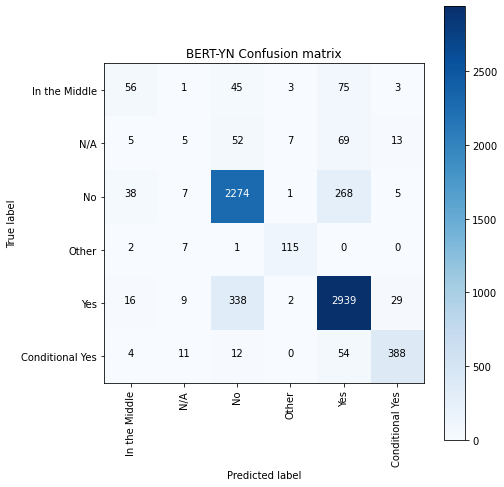

In [22]:
from sklearn.metrics import confusion_matrix
cmat = confusion_matrix(validation_gtruths['goldstandard2'], pred_results['goldstandard2'])

import numpy as np
import itertools
import matplotlib.pyplot as plt
# https://www.kaggle.com/fuzzywizard/fashion-mnist-cnn-keras-accuracy-93
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='BERT-YN Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.figure(figsize=(7,7))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plot_confusion_matrix(cmat, 
            classes = ['In the Middle','N/A','No','Other','Yes','Conditional Yes'])

In [23]:
pred_results['id'] = df_test['id']
sub_results = pred_results
sub_results = sub_results.rename(columns={"goldstandard2": "BERT DIS YN"})

results_df = pd.read_excel('/content/drive/MyDrive/DL Project/Results/ModelResultsFINAL.xlsx')

results_df = results_df.drop(['Unnamed: 0'], axis = 1)
results_df['BERT DIS YN'] = sub_results['BERT DIS YN']

column_names = ["id", "question-X", "answer-Y","BERT YN Q only","BERT YN A only","BERT YN Q+A", "BERT DIS YN","goldstandard2"]


results_df = results_df.reindex(columns=column_names)

results_df.to_excel('/content/drive/MyDrive/DL Project/Results/ModelResultsFINAL.xlsx')